# Estudo de Caso:<br>Dados RH
### 1• Qual a Correlação Entre os Atributos dos Funcionários?<br>2• Qual o Tempo de Serviço da Maioria dos Funcionários?<br>3• Qual Avaliação do Ano Anterior Foi Mais Comum?<br>4• Qual a Distribuição das Idades dos Funcionários?<br>5• Qual o Número de Treinamentos Mais Frequentes?<br>6• Qual a Proporção dos Funcionários Por Canal de Recrutamento?<br>7• Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?
<hr>

## Importando Pacotes

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando Dados

In [5]:
df = pd.read_csv('../data/02_dadosRH.csv', sep=',')
df.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [15]:
df.shape

(54808, 11)

## Aálise Exploratória, Limpeza e Transformação dos Dados

### Conferindo Valores Nulos

In [6]:
df.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

### Educação

In [12]:
df.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

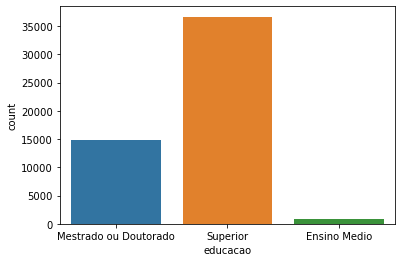

In [8]:
sns.countplot(df['educacao'])

### Avaliação do Ano Anterior

In [13]:
df.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

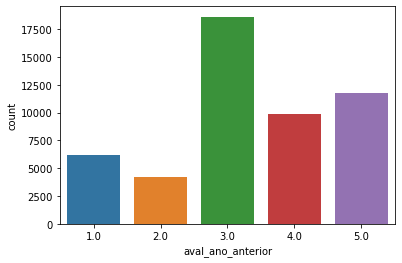

In [16]:
sns.countplot(df['aval_ano_anterior'])

### Valores Ausentes

In [17]:
df['educacao'].fillna(df['educacao'].mode()[0], inplace = True) # preenchendo a coluna educacao com o maior valor da moda da própria coluna

In [19]:
df['aval_ano_anterior'].fillna(df['aval_ano_anterior'].median(), inplace= True) # preenchendo a coluna aval_ano_anterior com a mediana da própria coluna

In [20]:
df.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

## Verificar o Balanceamento de Classe na Variável "promovido"

In [21]:
df.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

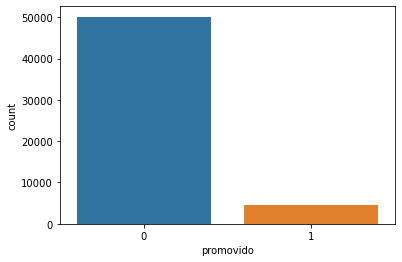

In [22]:
sns.countplot(df['promovido'])

In [25]:
df_classe_majoritaria = df[df.promovido == 0]
df_classe_minoritaria = df[df.promovido == 1]

print(f'{df_classe_majoritaria.shape}\n{df_classe_minoritaria.shape}')

(50140, 11)
(4668, 11)


In [29]:
# Upsamble da classe Minoritária
from sklearn.utils import resample
df_classe_minoritaria_upsambled = resample(df_classe_minoritaria, replace = True, n_samples = 50140, random_state =150)

In [30]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsambled])

In [31]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [32]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

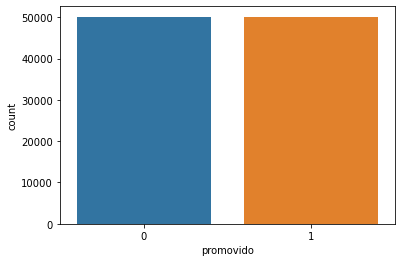

In [34]:
sns.countplot(dadosRH_balanceados['promovido'])

### Salvando Dados Balanceados

In [35]:
dadosRH_balanceados.to_csv('../output/02_dadosRH_balanceados.csv', encoding= 'utf-8', index=False)

## Qual a Correlação Entre os Atributos dos Funcionários?

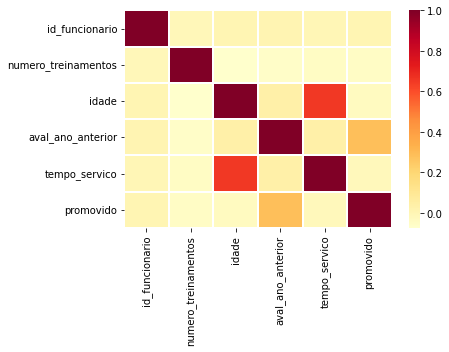

In [36]:
corr = dadosRH_balanceados.corr()
sns.heatmap(corr, cmap= 'YlOrRd', linewidths=0.1)
plt.show()

## Qual o Tempo de Serviço da Maioria dos Funcionários?

c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


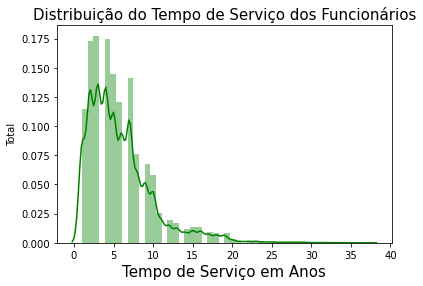

In [38]:
# Matriz de correlação para variáveis numéricas | Matriz de associação para variáveis categóricas
sns.distplot(dadosRH_balanceados['tempo_servico'], color='green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize=15)
plt.xlabel('Tempo de Serviço em Anos', fontsize=15)
plt.ylabel('Total')
plt.show()

## Qual Avaliação do Ano Anterior Foi Mais Comum?

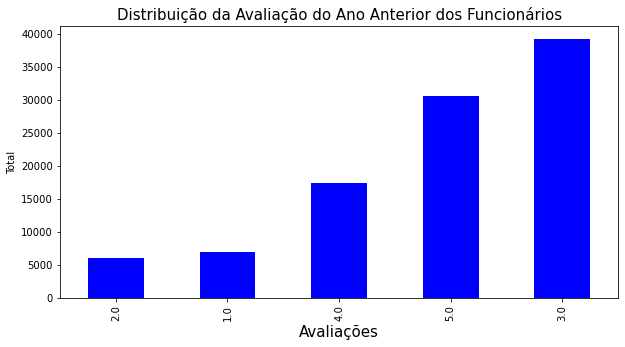

In [39]:
dadosRH_balanceados['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize =(10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15 )
plt.ylabel('Total')
plt.show()

## Qual a Distribuição das Idades do Funcionários?

c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


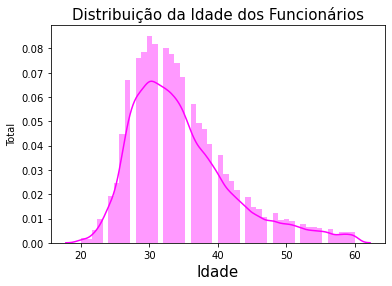

In [42]:
sns.distplot(dadosRH_balanceados['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

## Qual o Número de Treinamentos Mais Frequente?

c:\Users\tarmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


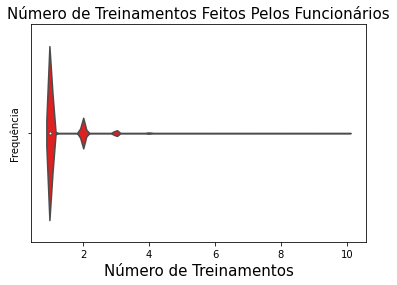

In [43]:
sns.violinplot(dadosRH_balanceados['numero_treinamentos'], color = 'red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()

## Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [45]:
dadosRH_balanceados['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

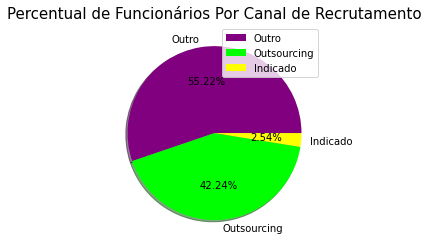

In [47]:
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicado"
colors = ['purple','lime','yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

## Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

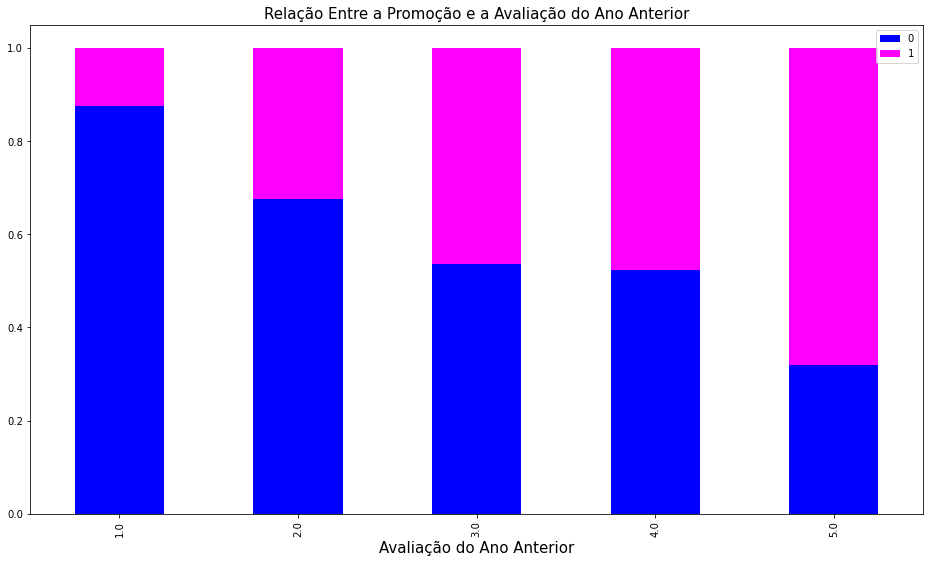

In [49]:
data = pd.crosstab(dadosRH_balanceados['aval_ano_anterior'], dadosRH_balanceados['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True, figsize = (16,9), color = ['blue','magenta'])
plt.title('Relação Entre a Promoção e a Avaliação do Ano Anterior', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()